# Tutorial 1 - Spatial analysis with Python

```{attention}
Finnish university students are encouraged to use the CSC Noppe platform. <br/>
<a href="https://noppe.csc.fi/"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>
```

In this tutorial, we will take a quick tour to Python's (spatial) data science ecosystem and see how we can use some of the fundamental open source Python packages, such as:

 - pandas / geopandas
 - shapely
 - pysal
 - pyproj
 - osmnx 
 - matplotlib (visualization)
 
As you can see, we won't use any GIS software for doing the programming (such as ArcGIS/arcpy or QGIS), but focus on learning the open source packages that are independent from any specific software. These libraries form nowadays not only the core for modern spatial data science, but they are also fundamental parts of commercial applications used and developed by many companies around the world. 

```{note} 

If you have experience working with the Python's spatial data science stack, this tutorial probably does not bring much new to you, but to get everyone on the same page, we will all go through this introductory tutorial.

```

## Contents

 - Reading / writing spatial data
 - Retrieving OpenStreetMap data
 - Reprojections
 - Spatial join
 - Plotting data with matplotlib

## Getting started

There are two options for running the codes in this tutorial:

1. **Run the codes using CSC Notebooks** (see the top of this page) which is **the easiest way and recommended** if you do not have experience installing Python software. With this option you have slightly limited computational resources (10 GB memory).
2. **Download this Notebook** (see instructions below) and run it using Jupyter Lab which you should have installed by following the [installation instructions](https://sustainability-gis.readthedocs.io/en/latest/course-info/installing-miniconda.html).

### Run the tutorial using own computer (optional - requires installations)

```{admonition} See the instructions
:class: dropdown

**Download the Notebook**

You can download this tutorial Notebook to your own computer by clicking the **Download button** from the Menu on the top-right section of the website. 

- Right-click the option that says `.ipynb` and choose **"Save link as .."**

![Download tutorial Notebook.](img/Download_notebook_button.png)

**Run the codes on your own computer**

Before you can run this Notebook, and/or do any programming, you need to launch the Jupyter Lab programming environment. The JupyterLab comes with the environment that you installed earlier (if you have not done this yet, follow the [installation instructions](https://sustainability-gis.readthedocs.io/en/latest/course-info/installing-miniconda.html)). To run the JupyterLab:

1. Using terminal/command prompt, navigate to the folder where you have downloaded the Jupyter Notebook tutorial: `$ cd /mydirectory/`
2. Activate the programming environment: `$ conda activate sustainability-gis`
3. Launch the JupyterLab: `$ jupyter lab`

After these steps, the JupyterLab interface should open, and you can start executing cells (see hints below at "Working with Jupyter Notebooks").

**Download the data**

**If you use your own computer**, [DOWNLOAD THE DATA](https://drive.google.com/file/d/1nEDjboon7zWfdNbA04zM8I_sp8mhbMW2/view?usp=sharing) to your own computer and extract it to the same location where you have downloaded this notebook. Inside the ZIP file, there is a folder called data which is used in the following parts of the tutorial.
```

## Working with Jupyter Notebooks

Jupyter Notebooks are documents that can be used and run inside the JupyterLab programming environment containing the computer code and rich text elements (such as text, figures, tables and links). 

**A couple of hints**:

- You can **execute a cell** by clicking a given cell that you want to run and pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or by clicking the "Play" button on top)
- You can **change the cell-type** between `Markdown` (for writing text) and `Code` (for writing/executing code) from the dropdown menu above.
- You can **get info/docs about a given Python function** by moving your cursor on top of the function and pressing <kbd>Shift</kbd> + <kbd>Tab</kbd>

See **further details and help for** [**using Notebooks and JupyterLab from here**](https://pythongis.org/part1/chapter-01/nb/04-using-jupyterlab.html).

## Fundamental library: Geopandas

In this course, the most often used Python package that you will learn is [geopandas](https://geopandas.org/). Geopandas makes it possible to work with geospatial data in Python in a relatively easy way. Geopandas combines the capabilities of the data analysis library [pandas](https://pandas.pydata.org/pandas-docs/stable/) with other packages like [shapely](https://shapely.readthedocs.io/en/stable/manual.html) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for managing spatial data. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. In case you wish to have additional help getting started with pandas, we recommend you to take a look at Chapter 3 from the openly available [Introduction to Python for Geographic Data Analysis -book](https://pythongis.org/part1/chapter-03/index.html). The main difference between GeoDataFrames and pandas DataFrames is that a [GeoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) should contain (at least) one column for geometries. By default, the name of this column is `'geometry'`. The geometry column is a [GeoSeries](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geoseries) which contains the geometries (points, lines, polygons, multipolygons etc.) as shapely objects. 

![geodataframe.png](img/geodataframe.png)


## Reading and writing spatial data

Next we will learn some of the basic functionalities of geopandas. We have a couple of GeoJSON files stored in the `data` folder that we will use.

We can read the data easily with `read_file()` -function:

In [3]:
import geopandas as gpd

# Filepath
fp = "data/buildings.geojson"

# Read the file
data = gpd.read_file(fp)

# How does it look?
data.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,...,start_date,wikipedia,id,timestamp,version,tags,osm_type,internet_access,changeset,geometry
0,Helsinki,None,29,None,00170,Unioninkatu,None,None,None,None,...,None,None,4253124,1542041335,4,None,way,None,NaN,"POLYGON ((24.95121 60.16999, 24.95122 60.16988..."
1,Helsinki,None,2,None,00100,Kaivokatu,ainfo@ateneum.fi,Ateneum,"Tu, Fr 10:00-18:00; We-Th 10:00-20:00; Sa-Su 1...",None,...,1887,fi:Ateneumin taidemuseo,8033120,1544822447,27,"{ ""architect"": ""Theodor Höijer"", ""contact:webs...",way,None,NaN,"POLYGON ((24.94477 60.16982, 24.9445 60.16981,..."
2,Helsinki,FI,22-24,None,None,Mannerheimintie,None,Lasipalatsi,None,None,...,1936,fi:Lasipalatsi,8035238,1533831167,23,"{ ""name:fi"": ""Lasipalatsi"", ""name:sv"": ""Glaspa...",way,None,NaN,"POLYGON ((24.93561 60.17045, 24.93555 60.17054..."
3,Helsinki,None,2,None,00100,Mannerheiminaukio,None,Kiasma,Tu 10:00-17:00; We-Fr 10:00-20:30; Sa 10:00-18...,None,...,1998,fi:Kiasma (rakennus),8042215,1553963033,30,"{ ""name:en"": ""Museum of Modern Art Kiasma"", ""n...",way,None,NaN,"POLYGON ((24.93682 60.17152, 24.93662 60.1715,..."
4,None,FI,None,None,None,None,None,None,None,None,...,None,None,15243643,1546289715,7,None,way,None,NaN,"POLYGON ((24.93675 60.16779, 24.9366 60.16789,..."


As we can see, the GeoDataFrame contains various attributes in separate columns. The `geometry` column contains the spatial information. We can take a look of some of the basic information about our GeoDataFrame with command:

In [4]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   addr:city           86 non-null     object  
 1   addr:country        57 non-null     object  
 2   addr:housenumber    88 non-null     object  
 3   addr:housename      4 non-null      object  
 4   addr:postcode       54 non-null     object  
 5   addr:street         89 non-null     object  
 6   email               2 non-null      object  
 7   name                81 non-null     object  
 8   opening_hours       8 non-null      object  
 9   operator            7 non-null      object  
 10  phone               8 non-null      object  
 11  ref                 1 non-null      object  
 12  url                 8 non-null      object  
 13  website             20 non-null     object  
 14  building            486 non-null    object  
 15  amenity             26 non-null 

From here, we can see that our data is indeed a GeoDataFrame object with 486 entries and 34 columns. You can also get descriptive statistics of your data by calling:

In [5]:
data.describe()

,id,timestamp,version,changeset
count,4.860000e+02,4.860000e+02,486.000000,66.0
mean,1.400780e+08,1.455829e+09,4.849794,0.0
std,1.633527e+08,9.247528e+07,4.561162,0.0
min,8.253000e+03,1.197929e+09,1.000000,0.0
25%,2.294267e+07,1.374229e+09,2.000000,0.0
50%,1.228699e+08,1.493288e+09,3.000000,0.0
75%,1.359805e+08,1.530222e+09,7.000000,0.0
max,1.042029e+09,1.555840e+09,31.000000,0.0


In this case, we didn't have many columns with numerical data, but typically you have numeric values in your dataset and this is a good way to get a quick view how the data look like.

Naturally, as the data is **spatial**, we want to visualize it to understand the nature of the data better. We can do this easily with `plot()` method:

<Axes: >

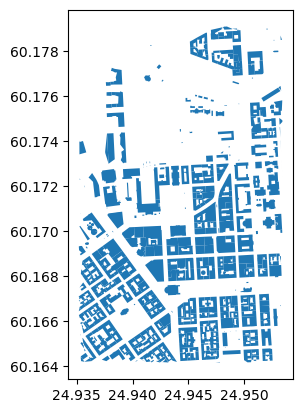

In [6]:
data.plot()

Now we can see that the data indeed represents buildings (in central Helsinki). Naturally we can also write this data to disk. Geopandas supports writing data to various data formats as well as to PostGIS which is the most widely used open source database for GIS. Let's write the data as a Geopackage to the same `data` directory from where we read the data. When writing data to local disk you can use `to_file()` method that exports the data in Shapefile format by default:

In [7]:
# Output filepath
outfp = "data/buildings_copy.gpkg"
data.to_file(outfp)

## Retrieving data from OpenStreetMap

Now we have seen how to read spatial data from disk. OpenStreetMap (OSM) is probably the most well known and widely used spatial dataset/database in the world. Also in this course, we will use OSM data frequently. Hence, let's see how we can retrieve data from OSM using a library called [omsnx](https://osmnx.readthedocs.io/). With `osmnx` you can easily download and extract data from anywhere in the world based on the [Overpass API](https://dev.overpass-api.de/overpass-doc/en/preface/preface.html). You can use `osmnx` e.g. to retrieve OSM data around a given address and applying a  2 km buffer around this location. Hence, `osmnx` is a very flexible library in terms of specifying the area of interest. 

OSM is a "database of the world", hence it contains **a lot** of information about different things. With `osmnx` you can easily extract information about:

- street networks --> `ox.graph_from_place(query)` | `ox.graph_from_polygon(polygon)`
- buildings --> `ox.features_from_place(query, tags={"buildings": True})` | `ox.features_from_polygon(polygon, tags={"buildings": True})`
- Amenities --> `ox.features_from_place(query, tags={"amenity": True})` | `ox.features_from_polygon(polygon, tags={"amenity": True})`
- landuse --> `ox.features_from_place(query, tags={"landuse": True})` | `ox.features_from_polygon(polygon, tags={"landuse": True})`
- natural elements --> `ox.features_from_place(query, tags={"natural": True})` | `ox.features_from_polygon(polygon, tags={"natural": True})`
- boundaries --> `ox.features_from_place(query, tags={"boundary": True})` | `ox.features_from_polygon(polygon, tags={"boundary": True})`

Let's see how we can download and extract OSM data about buildings for Helsinki central area using `osmnx`:

In [8]:
import osmnx as ox
from shapely.geometry import box

# Bounding box for given area (Helsinki city centre)
bounds = [24.9351773, 60.1641551, 24.9534055, 60.1791068]

# Create a bounding box Polygon
bbox = box(*bounds)

# Retrieve buildings from the given area
buildings = ox.features_from_polygon(bbox, tags={"building": True})

<Axes: >

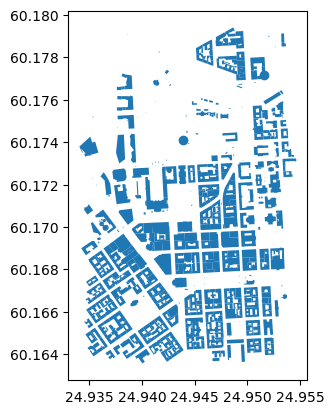

In [9]:
buildings.plot()

In [10]:
buildings.head()

geometry  \
element  id                                                              
node     55211772                            POINT (24.95158 60.17716)   
         5643347516                          POINT (24.94393 60.17412)   
relation 4198        POLYGON ((24.94898 60.17811, 24.94897 60.17826...   
         5603        POLYGON ((24.93696 60.16574, 24.93791 60.16607...   
         5605        POLYGON ((24.93758 60.16662, 24.93788 60.16672...   

                    addr:city addr:country addr:housenumber addr:postcode  \
element  id                                                                 
node     55211772    Helsinki           FI                4         00530   
         5643347516       NaN          NaN              NaN           NaN   
relation 4198             NaN          NaN              NaN           NaN   
         5603             NaN          NaN              NaN           NaN   
         5605             NaN          NaN              NaN           NaN   

                               addr:street air_conditioning   brand  \
element  id                                                           
node     55211772    John Stenbergin ranta              yes  Hilton   
         5643347516                    NaN              NaN     NaN   
relation 4198                          NaN              NaN     NaN   
         5603                          NaN              NaN     NaN   
         5605                          NaN              NaN     NaN   

                    brand:wikidata    building  ... toilets:disposal unisex  \
element  id                                     ...                           
node     55211772          Q598884         yes  ...              NaN    NaN   
         5643347516            NaN        roof  ...              NaN    NaN   
relation 4198                  NaN  apartments  ...              NaN    NaN   
         5603                  NaN         yes  ...              NaN    NaN   
         5605                  NaN  apartments  ...              NaN    NaN   

                    construction          type long_name long_name:en  \
element  id                                                             
node     55211772            NaN           NaN       NaN          NaN   
         5643347516          NaN           NaN       NaN          NaN   
relation 4198                NaN  multipolygon       NaN          NaN   
         5603                NaN  multipolygon       NaN          NaN   
         5605                NaN  multipolygon       NaN          NaN   

                    last_roof_renovation  ele electrified nohousenumber  
element  id                                                              
node     55211772                    NaN  NaN         NaN           NaN  
         5643347516                  NaN  NaN         NaN           NaN  
relation 4198                        NaN  NaN         NaN           NaN  
         5603                        NaN  NaN         NaN           NaN  
         5605                        NaN  NaN         NaN           NaN  

[5 rows x 168 columns]

Let's check how many buildings did we get:

In [11]:
len(buildings)

557

Okay, so in this sample there are over 500 buildings in the Helsinki city center area. Naturally, we would like to see them on a map. Let's plot our data using `plot()` (might take some time as there are many objects to plot):

<Axes: >

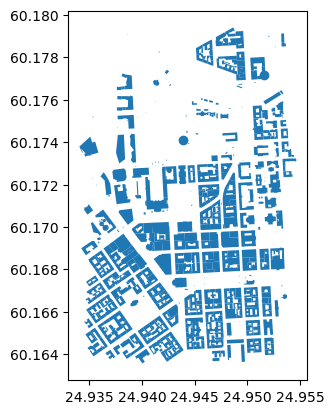

In [12]:
buildings.plot()

Great! As a result we got a map that seems to look correct. 

## Reprojecting data

As we can see from the previous maps that we have produced, the coordinates on the x and y axis hint that our geometries are represented in decimal degrees (WGS84). 
In many cases, you want to reproject your data to another CRS. Luckily, doing that is easy with `geopandas`. Let's first take a look what the Coordinate Reference System (CRS) of our GeoDataFrame is. We can access the CRS information of the GeoDataFrame by accessing an attribute called `crs`:

In [13]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As a result, we get information about the CRS, and we can see that the data is indeed in WGS84. We can also see that the EPSG code for the CRS is 4326.
We can easily reproject our data by using a method `to_crs()`. The easiest way to use the method is to specify the destination CRS as an EPSG code. Let's reproject our data into EPSG 3067 which is the most widely used projected coordinate reference system used in Finland, EUREF-FIN: 

In [14]:
projected = buildings.to_crs(epsg=3067)
projected.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As we can see, now we have an `Projected CRS` as a result. To confirm the difference, let's take a look at the geometry of the first row in our original `buildings` GeoDataFrame and the `projected` GeoDataFrame. To select a specific row in data, we can use the `iloc` indexing:

In [15]:
orig_geom = buildings.iloc[3]["geometry"]
projected_geom = projected.iloc[3]["geometry"]

print("Orig:\n", orig_geom, "\n")
print("Proj:\n", projected_geom)

Orig:
 POLYGON ((24.9369613 60.1657392, 24.9379058 60.1660655, 24.9379642 60.1660237, 24.9380225 60.1659819, 24.9380809 60.16594, 24.9381393 60.1658982, 24.9381977 60.1658564, 24.938256 60.1658146, 24.9383144 60.1657728, 24.9383728 60.165731, 24.9384312 60.1656891, 24.9384895 60.1656473, 24.9385479 60.1656055, 24.9383393 60.1655334, 24.9382943 60.1655179, 24.9382039 60.1655828, 24.9379254 60.1654869, 24.938016 60.1654217, 24.9382457 60.1652571, 24.9377066 60.1650714, 24.9375365 60.1651933, 24.9378377 60.1652971, 24.9373166 60.1656715, 24.9370145 60.1655673, 24.9368354 60.1656957, 24.9369613 60.1657392), (24.9377511 60.1656191, 24.9380371 60.1657184, 24.9378632 60.1658424, 24.9375772 60.1657431, 24.9377511 60.1656191)) 

Proj:
 POLYGON ((385517.03154353326 6671657.634354511, 385570.5673647722 6671692.325607269, 385573.66203062923 6671687.570643328, 385576.7511568531 6671682.815855383, 385579.8454917044 6671678.0497634625, 385582.9401826341 6671673.294807677, 385586.03488192044 6671668.5

As we can see the coordinates that form our Polygon has changed from decimal degrees to **meters**. Let's see what happens if we just call the geometries:

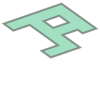

In [16]:
orig_geom

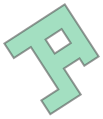

In [17]:
projected_geom

As you can see, we can draw the geometry directly in the screen, and we can easily see the difference in the shape of the two geometries. The `orig_geom` and `projected_geom` variables contain a Shapely geometry which is `Polygon` in this case. We can confirm this by checking the type:

In [18]:
type(orig_geom)

shapely.geometry.polygon.Polygon

These shapely geometries are used as the underlying data structure in most GIS packages in Python to present geometrical information. Shapely is fundamentally a Python wrapper for [GEOS](https://trac.osgeo.org/geos/) which is widely used library (written in C++) under the hood of many GIS softwares such as QGIS, GDAL, GRASS, PostGIS, Google Earth etc. Currently, there is [ongoing work](https://pygeos.readthedocs.io/en/latest/) to vectorize all the GEOS functionalities for Python and bring those eventually into Shapely which will greatly boost the performance of all geometry related operations in Python ecosystem (approaching the same efficiency as PostGIS). Some of these improvements can already be found under the hood of latest version of geopandas.

## Calculating area

One thing that is quite often interesting to know when working with spatial data, is the `area` of the geometries. In geopandas, we can easily calculate e.g. the area for each of our buildings by: 

In [19]:
projected["building_area"] = projected.area
projected["building_area"].describe()

count     557.000000
mean     1017.035823
std      1125.017454
min         0.000000
25%       181.791528
50%       751.634527
75%      1380.067442
max      8419.656661
Name: building_area, dtype: float64

We calculated the area by calling `area` which is the attribute containing information about areas of the buildings measured based on the map units of the data. Hence, in this case because our data is projected in Euref-FIN the units that we stored in `"building_area"` column are **square meters**. It's important to always keep in mind the CRS when calculating areas, distances etc. with geometries.  

## Spatial join

A commonly needed GIS functionality, is to be able to merge information between two layers using location as the `key`. Hence, it is somewhat similar approach as *table join* but because the operation is based on geometries, it is called *spatial join*. 
Next, we will see how we can conduct a spatial join and merge information between two layers. We will read all restaurants from the OSM for Helsinki Region, and combine information from restaurants to the underlying building (*restaurants typically are within buildings*). We will again use `osmnx` for reading the data, but this time we will get all amenities with tags "restaurant", "bar" or "pub":

<Axes: >

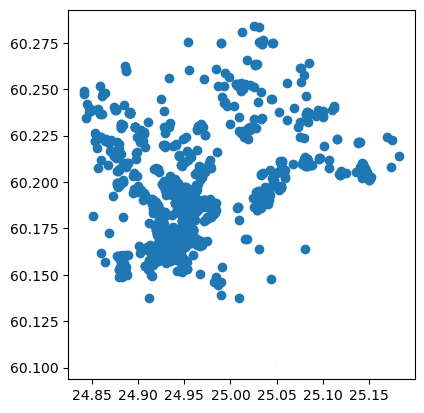

In [20]:
# Read restaurants
query = "Helsinki, Finland"
restaurants = ox.features_from_place(query, tags={"amenity": ["restaurant", "bar", "pub"]})
restaurants.plot()

In [21]:
restaurants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1630 entries, ('node', np.int64(25101780)) to ('way', np.int64(1276432323))
Columns: 245 entries, geometry to building:material
dtypes: geometry(1), object(244)
memory usage: 3.1+ MB


As we can see, the OSM for Helsinki contains more than 1500 restaurants altogether. As you can probably guess, the OSM data is far from "perfect" in terms of the quality of the restaurant listings. This is due to the voluntary nature of adding information to the OpenStreetMap, and the fact restaurants (as well as other POI features) are highly dynamic by nature, i.e. new amenities open and close all the time, and it is challenging to keep up to date with those changes (this is a challenge even for commercial companies).  

Let's also fetch buildings and administrative areas for the whole Helsinki area:

In [22]:
# Read buildings
query = "Helsinki, Finland"
hki_buildings = ox.features_from_place(query, tags={"building": True})

<Axes: >

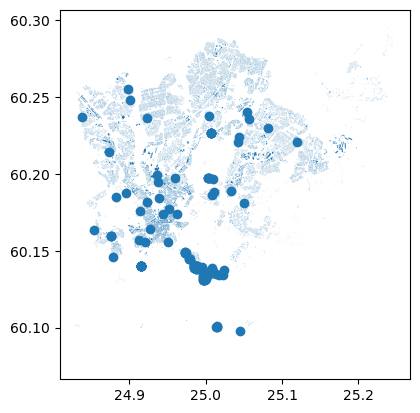

In [23]:
hki_buildings.plot()

In [24]:
# Print the number of rows and columns
print(hki_buildings.shape)

# Show the first lines 
hki_buildings.head(2)

(64734, 772)


geometry addr:city addr:country  \
element id                                                            
node    55211772   POINT (24.95158 60.17716)  Helsinki           FI   
        277311461  POINT (24.96018 60.19734)  Helsinki          NaN   

                  addr:housenumber addr:postcode            addr:street  \
element id                                                                
node    55211772                 4         00530  John Stenbergin ranta   
        277311461                5         00550            Sammatintie   

                  air_conditioning   brand brand:wikidata building  ...  \
element id                                                          ...   
node    55211772               yes  Hilton        Q598884      yes  ...   
        277311461              NaN     NaN            NaN   church  ...   

                  castle_type old_name:en payment:cheque payment:diners_club  \
element id                                                                     
node    55211772          NaN         NaN            NaN                 NaN   
        277311461         NaN         NaN            NaN                 NaN   

                  payment:maestro supervised service:vehicle:brakes  \
element id                                                            
node    55211772              NaN        NaN                    NaN   
        277311461             NaN        NaN                    NaN   

                  service:vehicle:oil_change service:vehicle:painting  \
element id                                                              
node    55211772                         NaN                      NaN   
        277311461                        NaN                      NaN   

                  service:vehicle:repairs  
element id                                 
node    55211772                      NaN  
        277311461                     NaN  

[2 rows x 772 columns]

As we can see, the OSM data contains more than 60 thousand building features that are represented with a mix of different types of geometries, namely Polygons and Points which are visible with large blue points on the map. In our case, we are only interested in the footprints of the buildings because we want to make a spatial join between restaurants and buildings. Hence, we want to remove the Point objects from our data. Luckily, this is easy because the points are represented with a specific OSM `element_type`: "node". We can see all OSM elements that are present in our data by checking the index levels:

In [25]:
# What kind of elements do we have?
hki_buildings.index.levels[0]

Index(['node', 'relation', 'way'], dtype='object', name='element')

From these, we are only interested in "way" and "relation" OSM elements which contain the building polygons. Hence, let's select those:

<Axes: >

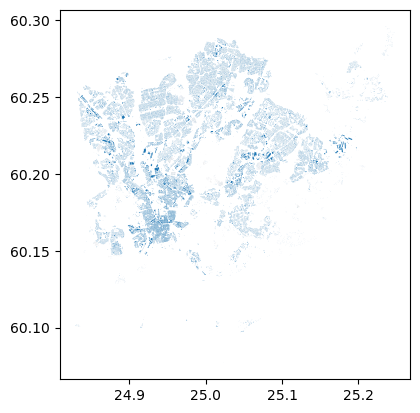

In [26]:
hki_buildings = hki_buildings.loc[(["way", "relation"])].copy()
hki_buildings.plot()

Joining data from buildings to the restaurants can be done easily using `sjoin()` function from geopandas:

In [27]:
# Join information from buildings to restaurants
join = gpd.sjoin(restaurants, hki_buildings)

# Print column names
print(join.columns)

# Show rows
join

Index(['geometry', 'addr:city_left', 'addr:country_left', 'amenity_left',
       'name_left', 'contact:website_left', 'cuisine_left',
       'opening_hours_left', 'diet:kosher_left', 'diet:vegan_left',
       ...
       'castle_type', 'old_name:en', 'payment:cheque',
       'payment:diners_club_right', 'payment:maestro', 'supervised',
       'service:vehicle:brakes', 'service:vehicle:oil_change',
       'service:vehicle:painting', 'service:vehicle:repairs'],
      dtype='object', length=1018)


geometry  \
element_left id_left                                                         
node         25101780                            POINT (24.85593 60.20729)   
             25279508                            POINT (24.86684 60.20897)   
             27392509                            POINT (24.88337 60.18118)   
             50808688                             POINT (25.03395 60.2045)   
             50808951                            POINT (25.03481 60.20454)   
...                                                                    ...   
way          1079281935  POLYGON ((25.05177 60.17933, 25.05189 60.17934...   
             1079281940  POLYGON ((25.05153 60.17989, 25.05158 60.1798,...   
             1079281941  POLYGON ((25.05145 60.17971, 25.05161 60.17973...   
             1093942712  POLYGON ((24.9699 60.19026, 24.96992 60.19026,...   
             1276432323  POLYGON ((25.04433 60.20683, 25.04453 60.20682...   

                        addr:city_left addr:country_left amenity_left  \
element_left id_left                                                    
node         25101780         Helsinki                FI          pub   
             25279508              NaN               NaN   restaurant   
             27392509              NaN               NaN   restaurant   
             50808688         Helsinki               NaN          pub   
             50808951              NaN               NaN   restaurant   
...                                ...               ...          ...   
way          1079281935       Helsinki               NaN   restaurant   
             1079281940       Helsinki               NaN   restaurant   
             1079281941       Helsinki               NaN   restaurant   
             1093942712            NaN               NaN   restaurant   
             1276432323       Helsinki                FI          pub   

                                    name_left         contact:website_left  \
element_left id_left                                                         
node         25101780           Muusan Krouvi                          NaN   
             25279508            Pikku Ranska  http://www.pikkuranska.com/   
             27392509    Ravintola Seurasaari                          NaN   
             50808688               Foxy Bear                          NaN   
             50808951             Pikku-Hukka                          NaN   
...                                       ...                          ...   
way          1079281935             GlassRoom                          NaN   
             1079281940            King Kebab                          NaN   
             1079281941                Fafa's                          NaN   
             1093942712                   NaN                          NaN   
             1276432323  Ravintola Siilinpesä                          NaN   

                           cuisine_left  \
element_left id_left                      
node         25101780               NaN   
             25279508            french   
             27392509               NaN   
             50808688               NaN   
             50808951      scandinavian   
...                                 ...   
way          1079281935             NaN   
             1079281940           kebab   
             1079281941  middle_eastern   
             1093942712             NaN   
             1276432323           pizza   

                                                        opening_hours_left  \
element_left id_left                                                         
node         25101780                                                  NaN   
             25279508    Mo-Th 10:30-22:15; Fr 11:00-23:00; Sa 12:00-23:00   
             27392509                                                  NaN   
             50808688    Mo-Th 10:00-22:00; Fr 10:00-23:00; Sa 11:00-23...   
             50808951    Tu 11:00-15:00; We 11:00-20:00; T

<Axes: >

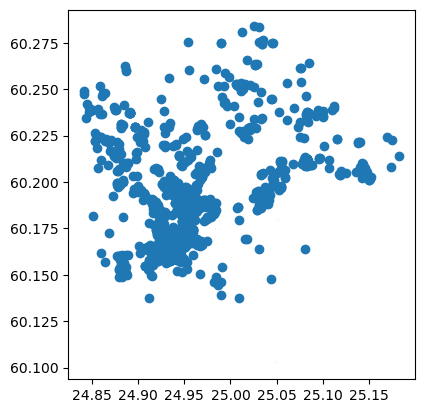

In [28]:
# Visualize the data as well
join.plot()

As we can see from the above, now we have merged information from the buildings to restaurants. The geometries of the `left` GeoDataFrame, i.e. restaurants were kept by default as the geometries.

## Select data based on spatial relationships

One handy trick and efficient trick for spatial join is to use it for **selecting data**. We can e.g. select all buildings that intersect with restaurants by conducting the spatial join other way around, i.e. using the buildings as the left GeoDataFrame and the restaurants as the right GeoDataFrame:

<Axes: >

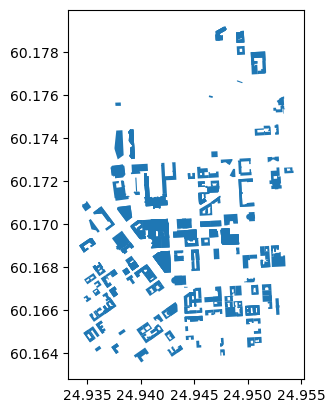

In [29]:
# Merge information from restaurants to buildings (conducts selection at the same time)
join2 = gpd.sjoin(buildings, restaurants, how="inner", predicate="intersects")
join2.plot()

As we can see (although the small building geometries are a bit poorly visible), the end result is a layer of buildings which intersected with the restaurants. This is a straightforward way to conduct simple spatial queries. You can specify with `predicate` parameter whether the binary predicate between the layers (i.e. the spatial relation between geometries) should be:

- `intersects`
- `contains`
- `within`

### Example: Select buildings for specific administrative area

In a similar manner, we can for example identify all buildings that are within a specific administrative area of Helsinki, such as Kamppi. Because OSM includes various different kinds of administrative boundaries (e.g. boundaries for the whole city vs postal code areas), we need to tell the `osmnx` to fetch only postal code areas. We can do this by using the [OSM admin_level](https://wiki.openstreetmap.org/wiki/Key:admin_level) key. In Finland, the admin_level 10 stands for postal code areas, hence we fetch only those features from OSM:

<Axes: >

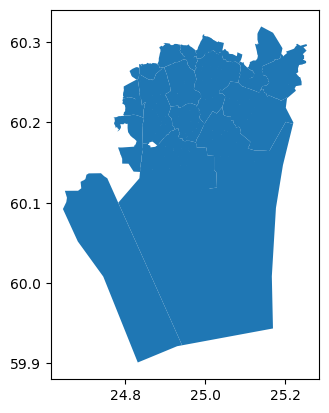

In [30]:
# Fetch all admin borders for Helsinki
hki_admins = ox.features_from_place(query, tags={"admin_level": "10"})
hki_admins.plot()

The `name` column in the OSM contains the names of all available postal code areas:

In [31]:
# Check all available districts based on values in "name" column
hki_admins.name.unique()

array(['Lauttasaari', 'Länsisatama', 'Eira', 'Ullanlinna', 'Punavuori',
       'Kaartinkaupunki', 'Katajanokka', 'Kruununhaka', 'Kluuvi',
       'Kamppi', 'Etu-Töölö', 'Taka-Töölö', 'Meilahti', 'Laakso',
       'Munkkiniemi', 'Kaivopuisto', 'Kallio', 'Sörnäinen',
       'Mustikkamaa-Korkeasaari', 'Alppiharju', 'Pasila', 'Vallila',
       'Hermanni', 'Ruskeasuo', 'Suomenlinna', 'Haaga', 'Pitäjänmäki',
       'Käpylä', 'Koskela', 'Kumpula', 'Toukola', 'Vanhakaupunki',
       'Oulunkylä', 'Kulosaari', 'Herttoniemi', 'Tammisalo', 'Laajasalo',
       'Villinki', 'Santahamina', 'Vartiosaari', 'Viikki', 'Konala',
       'Kaarela', 'Pakila', 'Tuomarinkylä', 'Pukinmäki', 'Malmi',
       'Ulkosaaret', 'Tapaninkylä', 'Suutarila', 'Suurmetsä',
       'Mellunkylä', 'Vartiokylä', 'Myyrmäki', 'Vapaala', 'Kaivoksela',
       'Vuosaari', 'Lintuvaara', 'Leppävaara', 'Ylästö', 'Pakkala',
       'Tammisto', 'Tikkurila', 'Talosaari', 'Salmenkallio',
       'Östersundom', 'Karhusaari', 'Ultuna', 'Sotunki',


We can now easily select only the data for `Kamppi` in Helsinki as follows:

In [32]:
# Select the boundaries for Kamppi
kamppi_admins = hki_admins.loc[hki_admins["name"] == "Kamppi"]

# Draw an interactive map
kamppi_admins.explore()

Finally, we can select all the buildings that belong to Kamppi:

<Axes: >

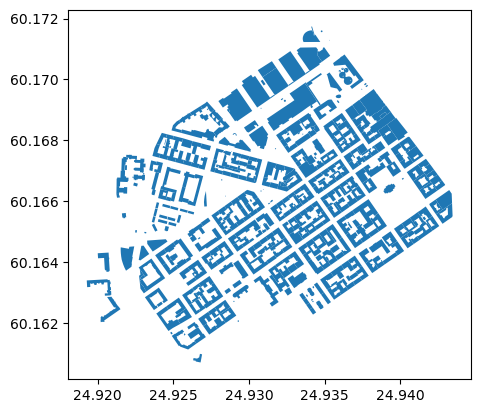

In [33]:
# Select buildings within this area
kamppi_buildings = gpd.sjoin(hki_buildings, kamppi_admins, predicate="intersects")
kamppi_buildings.plot()

## Plotting data with matplotlib

Thus far, we haven't really made any effort to make our maps visually appealing. Let's next see how we can adjust the appearance of our map, and how we can visualize many layers on top of each other. Let's start by visualizing the buildings that we selected earlier and adjust a bit of the colors and figuresize. We can adjust the color of polygons with `facecolor` parameter and the figure size with `figsize` parameter that accepts a tuple of width and height as an argument:

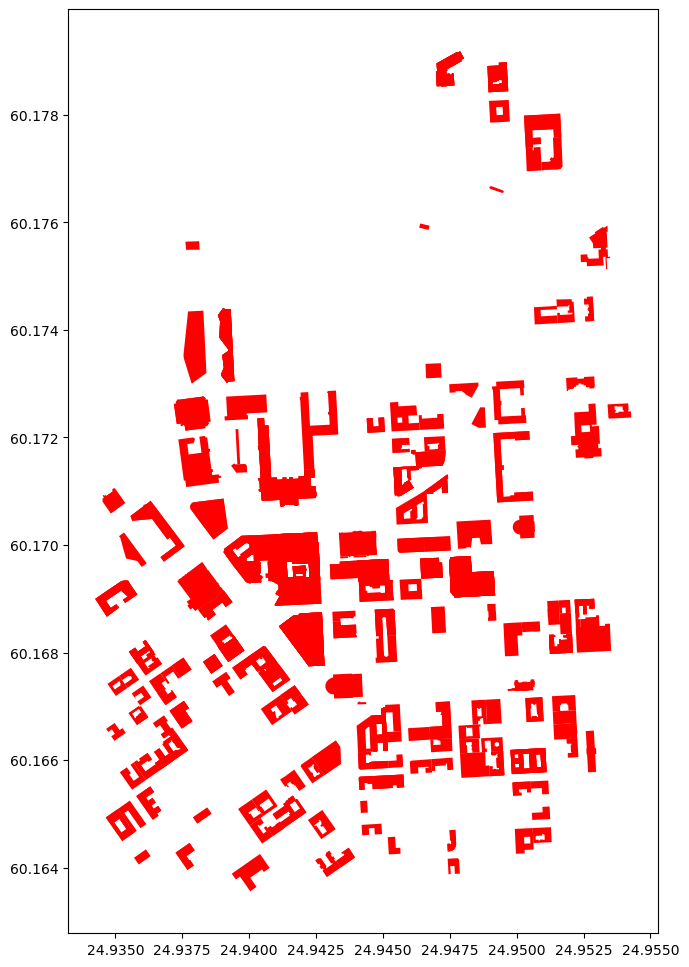

In [34]:
ax = join2.plot(facecolor="red", figsize=(12,12))

In [35]:
join2.columns

Index(['geometry', 'addr:city_left', 'addr:country_left',
       'addr:housenumber_left', 'addr:postcode_left', 'addr:street_left',
       'air_conditioning_left', 'brand_left', 'brand:wikidata_left',
       'building_left',
       ...
       'roof:levels_right', 'seamark:small_craft_facility:category',
       'seamark:type', 'building:colour_right', 'roof:shape_right',
       'building:part', 'height_right', 'roof:height_right', 'indoor',
       'building:material_right'],
      dtype='object', length=414)

Now with the bigger figure size, it is already a bit easier to see the selected buildings that have a restaurant inside them (according OSM). Let's color our buildings based on the building type. Hence, each building type category will receive a different color:  

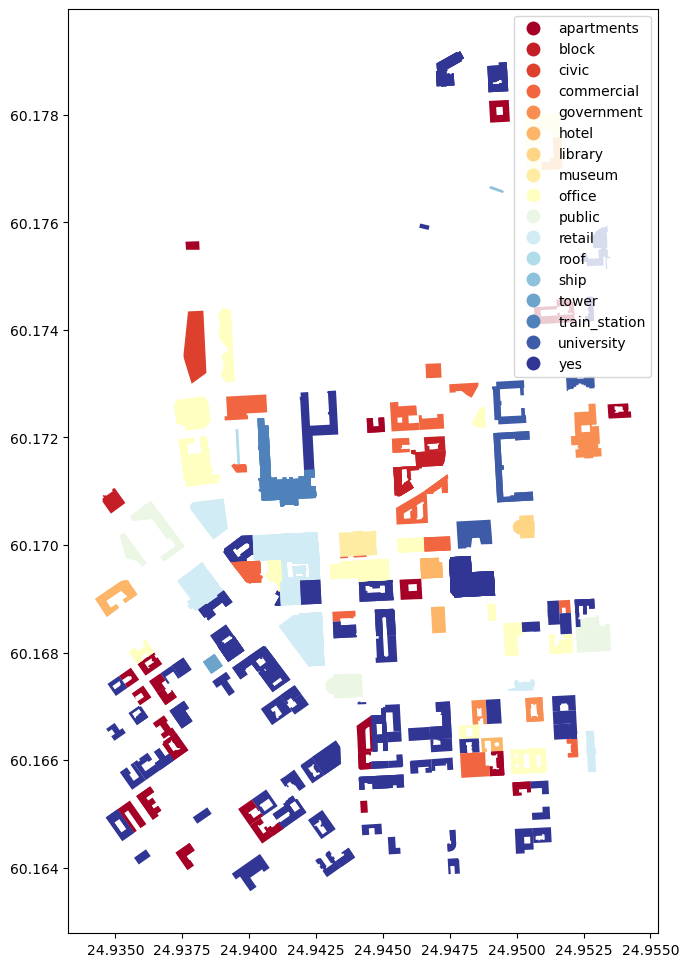

In [36]:
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

Now we used the parameter `column` to specify the attribute that is used to specify the color for each building (can be categorical or continuous). We used `cmap` to specify the colormap for the categories and we added the legend by specifying `legend=True`. 

To get a bit more context to our visualizaton. Let's also add roads with our buildings. To do that we first need to extract the roads from OSM:

In [37]:
# Get roads (retrieves walkable roads by default)
G = ox.graph_from_polygon(bbox)

# Parse roads from the graph
roads = ox.graph_to_gdfs(G, nodes=False, edges=True) 

Now we can continue and add the roads as a layer to our visualization with gray line color:

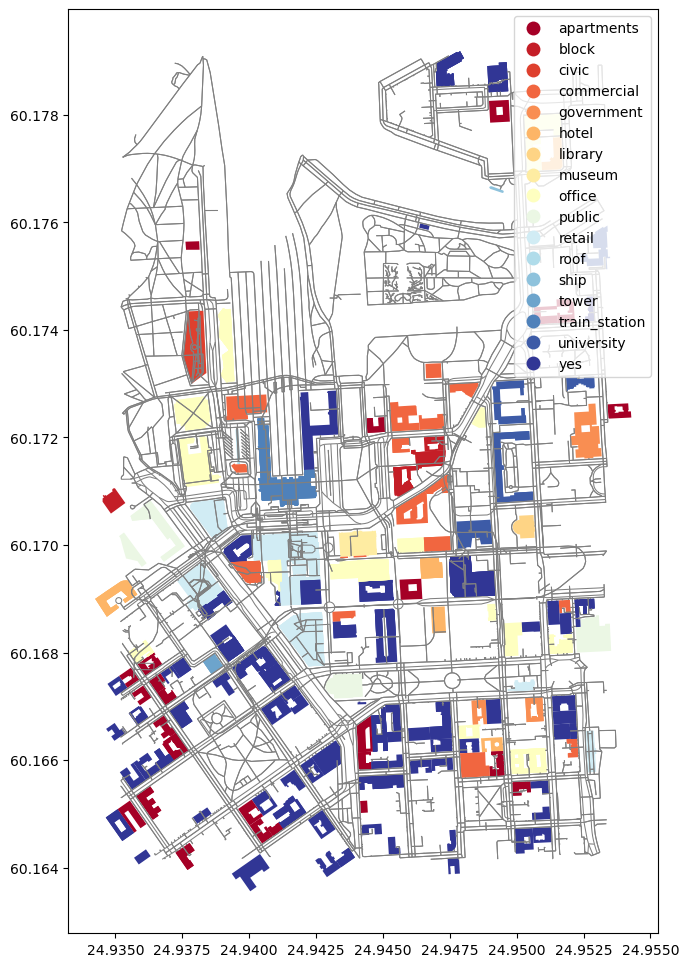

In [38]:
# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)

Perfect! Now it is much easier to understand our map because the roads brought much more context (assuming you know Helsinki). We ware able to add the roads to the same map by specifying the `ax` parameter to point to the axis that we received when first plotting the `join2` (i.e. selected buildings). In a similar manner, you can add as many layers in your map as you wish. Let's still do a small visual trick and specify that the background color in our map is black instead of white. This can be done easily by changing the `style` of matplotlib visualization renderer:

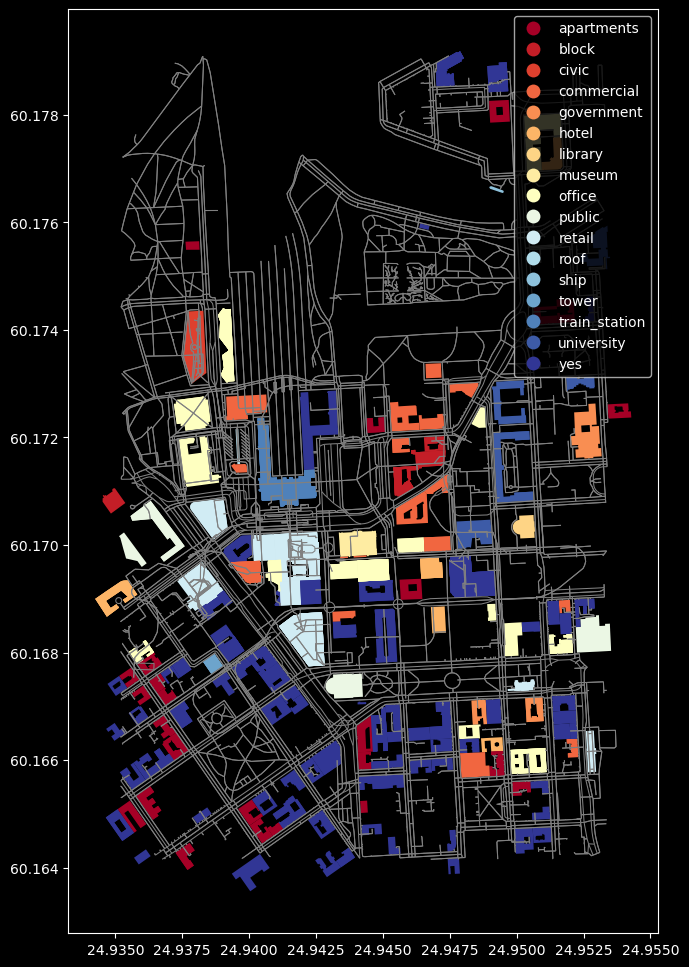

In [39]:
# Import matplotlib pyplot and use a dark_background theme
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)


Awesome! Now we have a nice dark theme with our map. With this information you should be able to get going with Exercise 1. 

## Further information

For further information, we recommend reading the Chapter 6 from the [Introduction to Python for Geographic Data Analysis](https://python-gis-book.readthedocs.io/en/develop/part2/chapter-06/index.html) -book.

We also recommend checking the materials from [Automating GIS Processes](https://autogis.github.io/) -course (GIS things) and [Geo-Python](https://geo-python.github.io/) -course (intro to Python and data analysis with pandas). In addition, we always recommend to check the latest documentation from the websites of the libraries:

 - [geopandas](https://geopandas.org/) 
 - [osmnx](https://osmnx.readthedocs.io/en/stable/)
 - [matplotlib](https://matplotlib.org/)
 - [pandas](https://pandas.pydata.org/)